<img src=https://i.ytimg.com/vi/knxlmCVFAZI/maxresdefault.jpg>

In [1]:
#!pip3 install twilio

In [2]:
import os
from twilio.rest import Client
from twilio_config import *
import time

from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json


import pandas as pd
import requests
from bs4  import BeautifulSoup
from tqdm import tqdm

from datetime import datetime


# Armado de la URL

In [3]:
query = 'Concepción'
api_key = API_KEY_WAPI

url_clima = 'http://api.weatherapi.com/v1/forecast.json?key='+api_key+'&q='+query+'&days=1&aqi=no&alerts=no'
url_clima

'http://api.weatherapi.com/v1/forecast.json?key=2271dd89e6e14edaace173055230707&q=Concepción&days=1&aqi=no&alerts=no'

In [4]:
response = requests.get(url_clima).json()

In [5]:
response

{'location': {'name': 'Concepción',
  'region': 'Bio-Bio',
  'country': 'Chili',
  'lat': -36.83,
  'lon': -73.05,
  'tz_id': 'America/Santiago',
  'localtime_epoch': 1723844840,
  'localtime': '2024-08-16 17:47'},
 'current': {'last_updated_epoch': 1723844700,
  'last_updated': '2024-08-16 17:45',
  'temp_c': 12.3,
  'temp_f': 54.1,
  'is_day': 1,
  'condition': {'text': 'Sunny',
   'icon': '//cdn.weatherapi.com/weather/64x64/day/113.png',
   'code': 1000},
  'wind_mph': 12.5,
  'wind_kph': 20.2,
  'wind_degree': 230,
  'wind_dir': 'SW',
  'pressure_mb': 1022.0,
  'pressure_in': 30.18,
  'precip_mm': 0.0,
  'precip_in': 0.0,
  'humidity': 67,
  'cloud': 0,
  'feelslike_c': 10.8,
  'feelslike_f': 51.4,
  'windchill_c': 8.9,
  'windchill_f': 48.1,
  'heatindex_c': 10.8,
  'heatindex_f': 51.5,
  'dewpoint_c': 4.6,
  'dewpoint_f': 40.3,
  'vis_km': 10.0,
  'vis_miles': 6.0,
  'uv': 4.0,
  'gust_mph': 13.2,
  'gust_kph': 21.3},
 'forecast': {'forecastday': [{'date': '2024-08-16',
    'date

In [6]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [7]:
response['forecast']

{'forecastday': [{'date': '2024-08-16',
   'date_epoch': 1723766400,
   'day': {'maxtemp_c': 11.6,
    'maxtemp_f': 52.8,
    'mintemp_c': 4.9,
    'mintemp_f': 40.7,
    'avgtemp_c': 7.7,
    'avgtemp_f': 45.9,
    'maxwind_mph': 9.2,
    'maxwind_kph': 14.8,
    'totalprecip_mm': 0.0,
    'totalprecip_in': 0.0,
    'totalsnow_cm': 0.0,
    'avgvis_km': 10.0,
    'avgvis_miles': 6.0,
    'avghumidity': 78,
    'daily_will_it_rain': 0,
    'daily_chance_of_rain': 0,
    'daily_will_it_snow': 0,
    'daily_chance_of_snow': 0,
    'condition': {'text': 'Partly Cloudy ',
     'icon': '//cdn.weatherapi.com/weather/64x64/day/116.png',
     'code': 1003},
    'uv': 3.0},
   'astro': {'sunrise': '07:34 AM',
    'sunset': '06:19 PM',
    'moonrise': '02:41 PM',
    'moonset': '05:25 AM',
    'moon_phase': 'Waxing Gibbous',
    'moon_illumination': 82,
    'is_moon_up': 1,
    'is_sun_up': 0},
   'hour': [{'time_epoch': 1723780800,
     'time': '2024-08-16 00:00',
     'temp_c': 6.5,
     'temp

In [8]:
response['forecast']['forecastday'][0].keys()

dict_keys(['date', 'date_epoch', 'day', 'astro', 'hour'])

In [9]:
len(response['forecast']['forecastday'][0]['hour'])

24

In [10]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1723780800,
 'time': '2024-08-16 00:00',
 'temp_c': 6.5,
 'temp_f': 43.7,
 'is_day': 0,
 'condition': {'text': 'Clear ',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png',
  'code': 1000},
 'wind_mph': 3.6,
 'wind_kph': 5.8,
 'wind_degree': 174,
 'wind_dir': 'S',
 'pressure_mb': 1025.0,
 'pressure_in': 30.27,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'snow_cm': 0.0,
 'humidity': 88,
 'cloud': 0,
 'feelslike_c': 5.5,
 'feelslike_f': 41.9,
 'windchill_c': 5.5,
 'windchill_f': 41.9,
 'heatindex_c': 6.5,
 'heatindex_f': 43.7,
 'dewpoint_c': 4.7,
 'dewpoint_f': 40.4,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 6.4,
 'gust_kph': 10.3,
 'uv': 0}

In [11]:
response['forecast']['forecastday'][0]['hour'][0]['time'].split()[0]

'2024-08-16'

In [12]:
response['forecast']['forecastday'][0]['hour'][1]['time']

'2024-08-16 01:00'

In [13]:
int(response['forecast']['forecastday'][0]['hour'][1]['time'].split()[1].split(':')[0])

1

In [14]:
response['forecast']['forecastday'][0]['hour'][0]['condition']['text'] #Condition

'Clear '

In [15]:
response['forecast']['forecastday'][0]['hour'][0]['temp_c'] # Temperature

6.5

In [16]:
response['forecast']['forecastday'][0]['hour'][0]['will_it_rain']

0

In [17]:
response['forecast']['forecastday'][0]['hour'][2]['chance_of_rain']

0

# Dataframe - Explo

In [18]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [19]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1723780800,
 'time': '2024-08-16 00:00',
 'temp_c': 6.5,
 'temp_f': 43.7,
 'is_day': 0,
 'condition': {'text': 'Clear ',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png',
  'code': 1000},
 'wind_mph': 3.6,
 'wind_kph': 5.8,
 'wind_degree': 174,
 'wind_dir': 'S',
 'pressure_mb': 1025.0,
 'pressure_in': 30.27,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'snow_cm': 0.0,
 'humidity': 88,
 'cloud': 0,
 'feelslike_c': 5.5,
 'feelslike_f': 41.9,
 'windchill_c': 5.5,
 'windchill_f': 41.9,
 'heatindex_c': 6.5,
 'heatindex_f': 43.7,
 'dewpoint_c': 4.7,
 'dewpoint_f': 40.4,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 6.4,
 'gust_kph': 10.3,
 'uv': 0}

Fecha

In [20]:
i = 0
fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
fecha

'2024-08-16'

Hora

In [21]:
hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
hora

0

Condicion (lluvia/no lluvia)

In [22]:
condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
condicion

'Clear '

Temperatura

In [23]:
temperatura = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
temperatura

6.5

LLuvia - Will it rain (0/1)

In [24]:
lluvia = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
print(lluvia)
prob_lluvia = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
print(prob_lluvia)

0
0


In [25]:
del(i)

# Dataframe - Explo

In [26]:
response.keys()

dict_keys(['location', 'current', 'forecast'])

In [27]:
response['forecast']['forecastday'][0]['hour'][0]

{'time_epoch': 1723780800,
 'time': '2024-08-16 00:00',
 'temp_c': 6.5,
 'temp_f': 43.7,
 'is_day': 0,
 'condition': {'text': 'Clear ',
  'icon': '//cdn.weatherapi.com/weather/64x64/night/113.png',
  'code': 1000},
 'wind_mph': 3.6,
 'wind_kph': 5.8,
 'wind_degree': 174,
 'wind_dir': 'S',
 'pressure_mb': 1025.0,
 'pressure_in': 30.27,
 'precip_mm': 0.0,
 'precip_in': 0.0,
 'snow_cm': 0.0,
 'humidity': 88,
 'cloud': 0,
 'feelslike_c': 5.5,
 'feelslike_f': 41.9,
 'windchill_c': 5.5,
 'windchill_f': 41.9,
 'heatindex_c': 6.5,
 'heatindex_f': 43.7,
 'dewpoint_c': 4.7,
 'dewpoint_f': 40.4,
 'will_it_rain': 0,
 'chance_of_rain': 0,
 'will_it_snow': 0,
 'chance_of_snow': 0,
 'vis_km': 10.0,
 'vis_miles': 6.0,
 'gust_mph': 6.4,
 'gust_kph': 10.3,
 'uv': 0}

Fecha

In [28]:
i = 0
fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
fecha

'2024-08-16'

Hora

In [29]:
hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
hora

0

Condicion (lluvia/no lluvia)

In [30]:
condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
condicion

'Clear '

Temperatura

In [31]:
temperatura = response['forecast']['forecastday'][0]['hour'][i]['temp_c']
temperatura

6.5

LLuvia - Will it rain (0/1)

In [32]:
lluvia = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
print(lluvia)
prob_lluvia = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
print(prob_lluvia)

0
0


In [33]:
del(i)

# Dataframe

In [34]:
def get_forecast(response,i):
    
    fecha = response['forecast']['forecastday'][0]['hour'][i]['time'].split()[0]
    hora = int(response['forecast']['forecastday'][0]['hour'][i]['time'].split()[1].split(':')[0])
    condicion = response['forecast']['forecastday'][0]['hour'][i]['condition']['text']
    tempe = float(response['forecast']['forecastday'][0]['hour'][i]['temp_c'])
    rain = response['forecast']['forecastday'][0]['hour'][i]['will_it_rain']
    prob_rain = response['forecast']['forecastday'][0]['hour'][i]['chance_of_rain']
    
    return fecha,hora,condicion,tempe,rain,prob_rain

In [35]:
datos = []

for i in tqdm(range(len(response['forecast']['forecastday'][0]['hour'])),colour = 'green'):
    
    datos.append(get_forecast(response,i))
    

100%|██████████| 24/24 [00:00<00:00, 206277.25it/s]


In [36]:
datos

[('2024-08-16', 0, 'Clear ', 6.5, 0, 0),
 ('2024-08-16', 1, 'Clear ', 6.2, 0, 0),
 ('2024-08-16', 2, 'Clear ', 5.9, 0, 0),
 ('2024-08-16', 3, 'Clear ', 5.7, 0, 0),
 ('2024-08-16', 4, 'Clear ', 5.4, 0, 0),
 ('2024-08-16', 5, 'Clear ', 5.1, 0, 0),
 ('2024-08-16', 6, 'Clear ', 5.0, 0, 0),
 ('2024-08-16', 7, 'Clear ', 4.9, 0, 0),
 ('2024-08-16', 8, 'Sunny', 4.9, 0, 0),
 ('2024-08-16', 9, 'Sunny', 6.1, 0, 0),
 ('2024-08-16', 10, 'Sunny', 7.9, 0, 0),
 ('2024-08-16', 11, 'Partly Cloudy ', 9.6, 0, 0),
 ('2024-08-16', 12, 'Overcast ', 10.7, 0, 0),
 ('2024-08-16', 13, 'Overcast ', 11.2, 0, 0),
 ('2024-08-16', 14, 'Overcast ', 11.5, 0, 0),
 ('2024-08-16', 15, 'Partly Cloudy ', 11.6, 0, 0),
 ('2024-08-16', 16, 'Sunny', 11.4, 0, 0),
 ('2024-08-16', 17, 'Sunny', 12.3, 0, 0),
 ('2024-08-16', 18, 'Overcast ', 9.4, 0, 0),
 ('2024-08-16', 19, 'Overcast ', 8.3, 0, 0),
 ('2024-08-16', 20, 'Overcast ', 7.5, 0, 0),
 ('2024-08-16', 21, 'Overcast ', 7.1, 0, 0),
 ('2024-08-16', 22, 'Overcast ', 6.5, 0, 0),
 ('

In [37]:
datos[0]

('2024-08-16', 0, 'Clear ', 6.5, 0, 0)

In [38]:
col = ['Fecha','Hora','Condicion','Temperatura','Lluvia','prob_lluvia']
df = pd.DataFrame(datos,columns=col)
df = df.sort_values(by = 'Hora',ascending = True)
df

,Fecha,Hora,Condicion,Temperatura,Lluvia,prob_lluvia
0,2024-08-16,0,Clear,6.5,0,0
1,2024-08-16,1,Clear,6.2,0,0
2,2024-08-16,2,Clear,5.9,0,0
3,2024-08-16,3,Clear,5.7,0,0
4,2024-08-16,4,Clear,5.4,0,0
5,2024-08-16,5,Clear,5.1,0,0
6,2024-08-16,6,Clear,5.0,0,0
7,2024-08-16,7,Clear,4.9,0,0
8,2024-08-16,8,Sunny,4.9,0,0
9,2024-08-16,9,Sunny,6.1,0,0


In [39]:
# data_cli = {
#     'Fecha':datos[0][0],
#     'Hora':datos[1][],
#     'Tiempo':condicion,
#     'Temperatura':tempe,
#     'LLoverá':rain,
#     'prob_lluvia':prob_rain
    
# }

# df = pd.DataFrame(data_cli)
# df = df.sort_values(by = 'Hora',ascending = True)

In [40]:
df[df['Lluvia']==1]

,Fecha,Hora,Condicion,Temperatura,Lluvia,prob_lluvia


In [41]:
df_rain =  df[(df['Lluvia']==1) & (df['Hora']>6) & (df['Hora']< 22)]
df_rain = df_rain[['Hora','Condicion']]
df_rain.set_index('Hora', inplace = True)

In [42]:
df['Fecha'][0]

'2024-08-16'

In [43]:
df_rain

,Condicion
Hora,


# Mensaje Template

In [44]:
'\nHola! \n\n\n El pronostico del tiempo hoy '+ df['Fecha'][0] +' en ' + query +' es : \n\n\n ' + str(df_rain)

'\nHola! \n\n\n El pronostico del tiempo hoy 2024-08-16 en Concepción es : \n\n\n Empty DataFrame\nColumns: [Condicion]\nIndex: []'

In [45]:
PHONE_NUMBER

'+16195685691'

# Mensaje SMS desde Twilio

https://www.twilio.com/docs/messaging/quickstart/python

In [46]:
time.sleep(2)
account_sid = TWILIO_ACCOUNT_SID 
auth_token = TWILIO_AUTH_TOKEN

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body='\n\n\n Hola! \n\n\n El pronostico de lluvia hoy '+ df['Fecha'][0] +' en ' + query +' es : \n\n\n ' + str(df_rain),
                     from_=PHONE_NUMBER,
                     to='+56982091549'
                 )

print('Mensaje Enviado ' + message.sid)

Mensaje Enviado SM51a609bf93fa542f992b04c4733e08f4


# Challenge 

* Extrae el valor del dolar en tu país y el top 10 de criptomonedas con su respectiva valoración
* Ahora envia un mensaje diarío a tu Whatsapp usando Twilio

**hint 💡** Investiga que API's gratuitas existen para consultar estos datos



<img src="WhatsApp Image 2022-09-13 at 9.12.18 AM.jpeg" width="200" height="200" />

In [ ]:
import pysurfline

# spotId Buchupureo
spotId = "640a4d90e92030fa8aa15c69"

spotforecasts = pysurfline.get_spot_forecasts(
    spotId,
    days=4,
    intervalHours=3,
)

df = spotforecasts.get_dataframe()

In [ ]:
df.head()

,timestamp_dt,timestamp_timestamp,probability,utcOffset,surf_min,surf_max,surf_optimalScore,surf_plus,surf_humanRelation,surf_raw_min,...,swells_5_directionMin,swells_5_optimalScore,speed,direction,directionType,gust,optimalScore,temperature,condition,pressure
0,2024-08-07 04:00:00,1723003200,100.000000,-4,1.2,1.8,2,False,Chest to overhead,1.50258,...,0.0,0,9.42239,129.24529,Cross-shore,10.44458,0,5.45000,NIGHT_CLEAR,1027
1,2024-08-07 07:00:00,1723014000,100.000000,-4,1.2,1.8,2,False,Chest to overhead,1.40931,...,0.0,0,9.40948,142.73720,Cross-shore,10.13750,0,4.83120,NIGHT_CLEAR,1027
2,2024-08-07 10:00:00,1723024800,100.000000,-4,1.2,1.8,2,False,Chest to overhead,1.40931,...,0.0,0,11.67915,143.35279,Cross-shore,13.70470,0,4.46184,NIGHT_CLEAR,1026
3,2024-08-07 13:00:00,1723035600,86.666667,-4,1.2,1.8,2,False,Chest to overhead,1.38859,...,0.0,0,8.62234,145.01262,Cross-shore,11.17539,0,5.36973,CLEAR,1027
4,2024-08-07 16:00:00,1723046400,100.000000,-4,1.2,1.5,2,False,Chest to head,1.35750,...,0.0,0,12.61106,207.62860,Onshore,15.96820,0,9.22708,CLEAR,1027


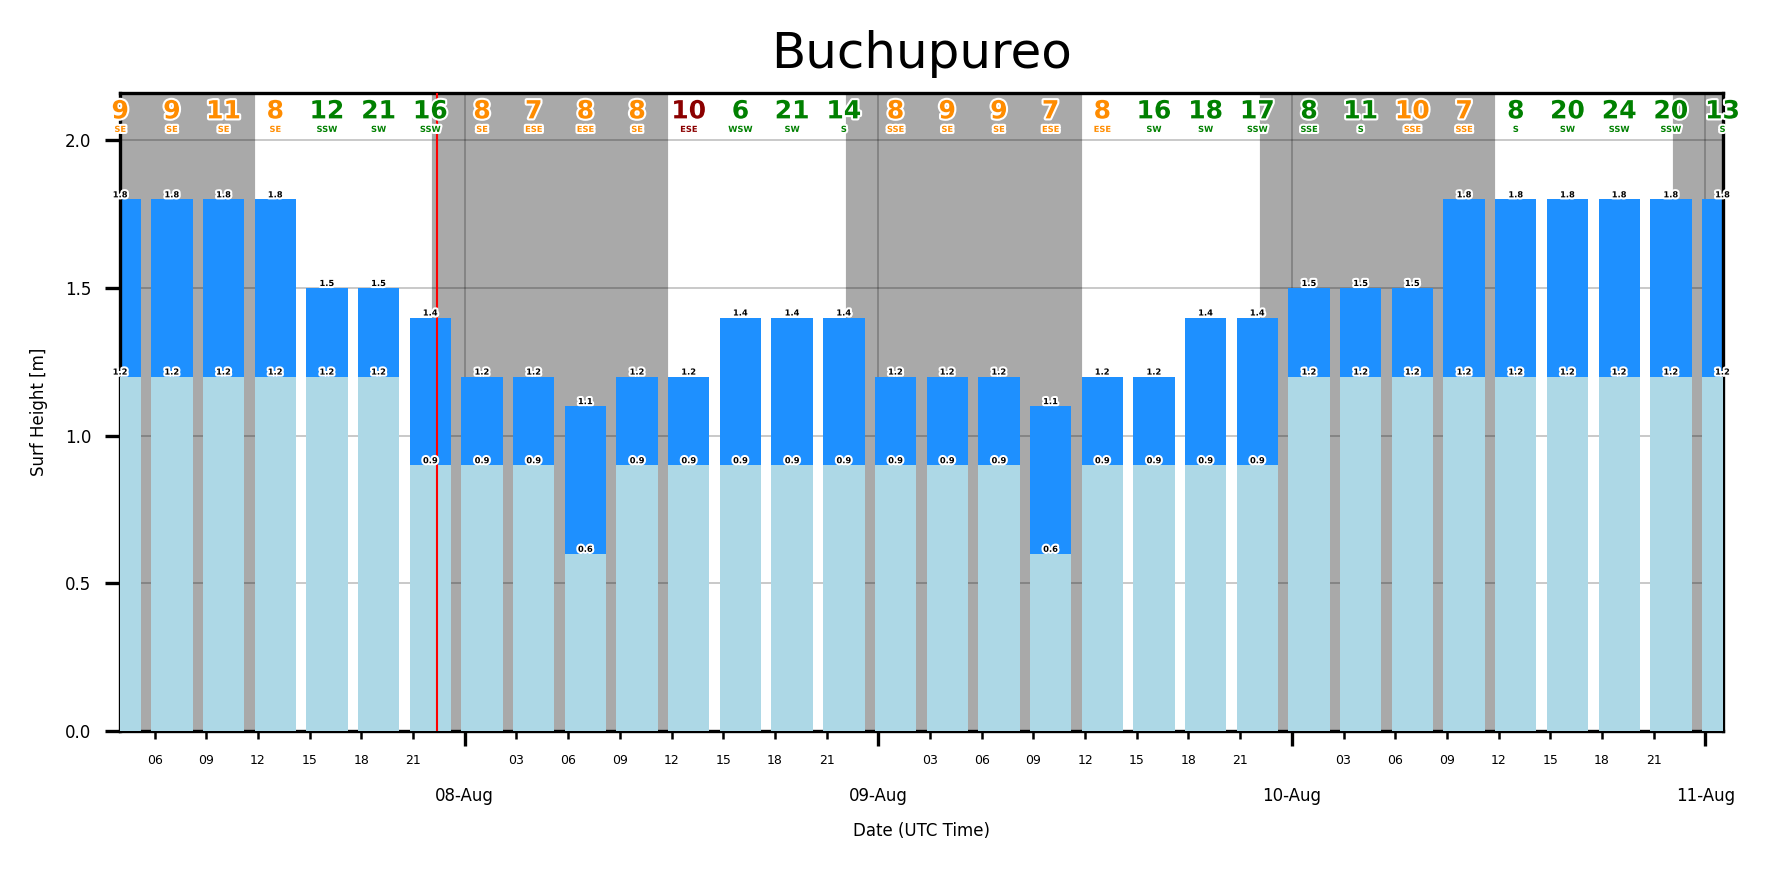

In [ ]:
pysurfline.plot_surf_report(
    spotforecasts,
    barLabels=True,
    wind = True
)

In [ ]:
#Condiciones
spotId = "640a4d90e92030fa8aa15c69"
wind = 'Offshore'
max_height = 2.5
min_height = 2
sunrise = 8
sunset = 18

In [ ]:

df_sesh = df[
    (df['surf_max'] <= max_height) & (df['surf_max'] >= min_height) &
    (df['timestamp_dt'].dt.hour <= sunset) & (df['timestamp_dt'].dt.hour >= sunrise) &
    (df['directionType'] != wind)
].copy()


In [ ]:

df_sesh['date'] = df_sesh['timestamp_dt'].dt.date
df_sesh['hour'] = df_sesh['timestamp_dt'].dt.hour


In [ ]:
df_sms = df_sesh[['hour', 'surf_max', 'directionType']]
df_sms

,hour,surf_max,directionType


In [ ]:
sms = df_sms.to_string(index=False)

In [ ]:
def wave_sms(spotId, wind, max_height, min_height, sunrise, sunset):

    spotforecasts = pysurfline.get_spot_forecasts(
        spotId,
        days=4,
        intervalHours=3,
    )

    df = spotforecasts.get_dataframe()

    # Comparar condiciones
    df_sesh = df[
        (df['surf_max'] <= max_height) & (df['surf_max'] >= min_height) &
        (df['timestamp_dt'].dt.hour <= sunset) & (df['timestamp_dt'].dt.hour >= sunrise) &
        (df['directionType'] != wind)
    ].copy()

    df_sesh['date'] = df_sesh['timestamp_dt'].dt.date
    df_sesh['hour'] = df_sesh['timestamp_dt'].dt.hour

    # Data para el sms
    df_sms = df_sesh[['hour', 'surf_max', 'directionType']]

    # SMS a string
    sms = df_sms.to_string(index=False)

    return sms


# Mensaje Twilio

In [ ]:
time.sleep(2)
account_sid = TWILIO_ACCOUNT_SID 
auth_token = TWILIO_AUTH_TOKEN

client = Client(account_sid, auth_token)

message = client.messages \
                .create(
                     body='\nHola! \n\n\n Hoy puede salir ola en Buchu.' + wave_sms(spotId, wind, max_height, min_height, sunrise, sunset),
                     from_=PHONE_NUMBER,
                     to='+56982091549'
                 )

print('Mensaje Enviado ' + message.sid)

Mensaje Enviado SMca131045f64731b933ec26e0813c5af2
